# **Business scenario and problem:**
The HR department at Salifort Motors wants to take some initiatives to improve the employees satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

my goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

BY predicting if an employees is likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

# **Data Dictionary**:

 - **satisfaction_level**: Reflects the level of satisfaction reported by employees, offering insights into their overall contentment within the organization.

 - **last_evaluation**: Indicates the most recent performance evaluation score of employees, providing a glimpse into their professional progress.
 
 - **number_project**: Represents the number of projects assigned to employees, shedding light on their workload and level of engagement.

 - **average_monthly_hours**: Displays the average number of hours worked per month by employees, offering perspective on their dedication and work ethic.
 
 - **time_spend_company**: Illustrates the duration of employment for each individual, indicating potential correlations between tenure and turnover.

 - **Work_accident**: Binary indicator denoting whether an employee has been involved in a work-related accident, highlighting workplace safety concerns.

 - **left**: Binary target variable indicating whether an employee has left the company, serving as the focal point for predictive modeling efforts.

 - **promotion_last_5years**: Binary indicator signaling whether an employee has received a promotion within the last five years, influencing career advancement opportunities.

 - **Department**: Categorizes employees based on their department within the organization, offering insights into departmental dynamics.

 - **salary**: Classifies employees into salary brackets, providing insight into compensation levels and potential impact on retention.

In [27]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

plt.rcParams.update({'figure.dpi': 150})

# **Data preparation**

In [2]:
# load dataset
df = pd.read_csv('HR_Sailfort_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.rename(columns={'Work_accident':'work_accident', 'time_spend_company':'tenure','Department':'department'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [24]:
cat_cols = ['department','salary']
num_cols = [cols for cols in df.columns if cols not in cat_cols]

In [25]:
# check valid value in categorical columns
for i in cat_cols:
    print(f'{i}: {df[i].unique()}, \n')

department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'], 

salary: ['low' 'medium' 'high'], 



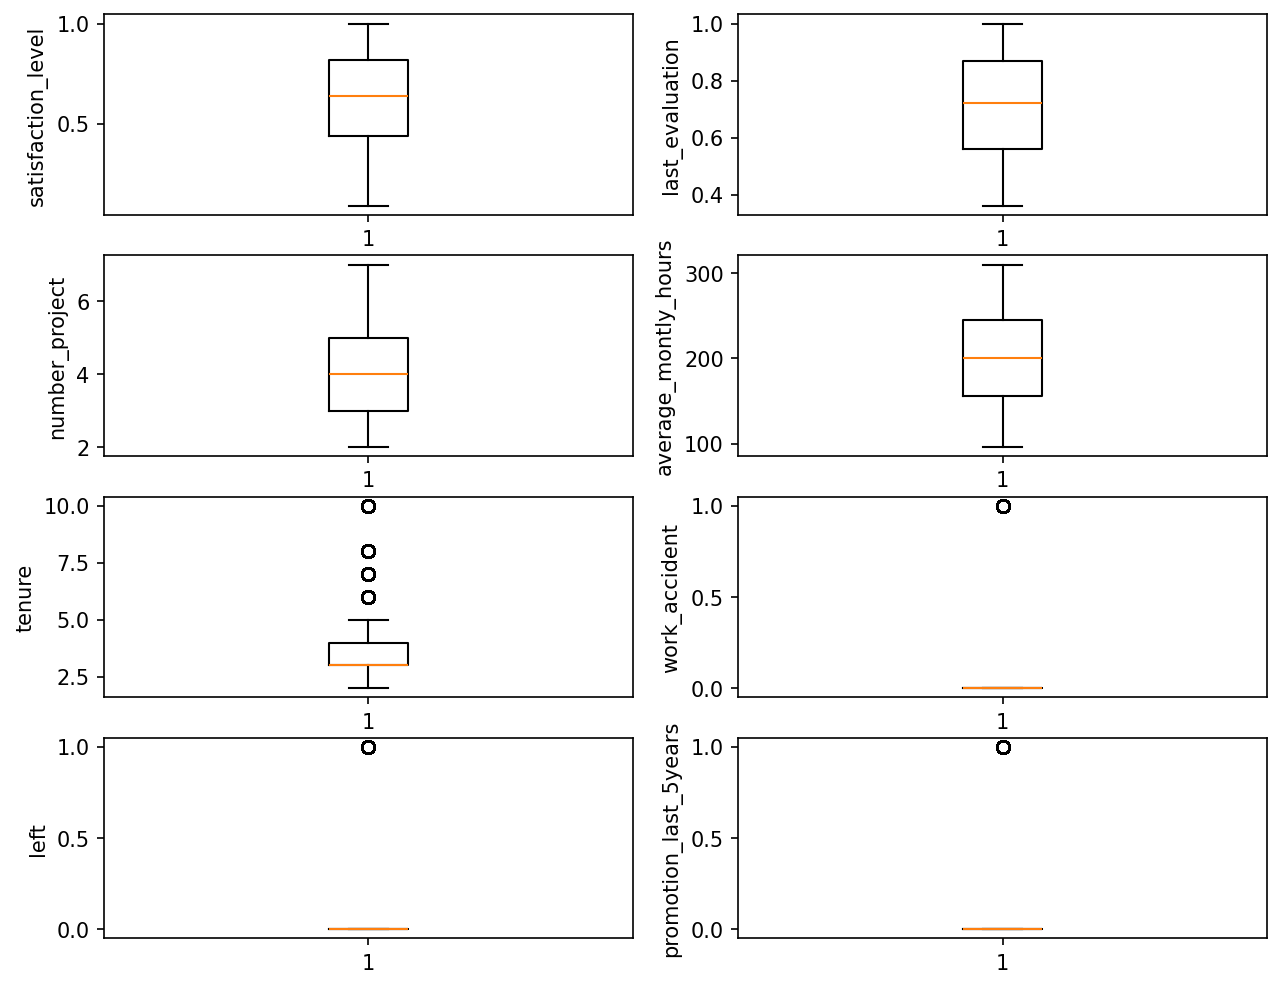

In [87]:
#check outliers in numerical columns
plt.figure(figsize=(10,1*len(num_cols)))

for i,col in enumerate(num_cols):
    plt.subplot(round((len(num_cols)+1)/2),2,i+1)
    plt.boxplot(df[col])
    plt.ylabel(col)

plt.show()


# EDA

## Univariate Analysis

In [ ]:
Median Tenure cho thấy mức độ gắn bó và lòng trung thành của nhân viên với công ty. Median Tenure càng cao thì tỉ lệ nhân viên gắn bó lâu dài càng lớn.

Điều này phản ánh văn hóa và môi trường làm việc tốt, cho thấy nhân viên hài lòng với công việc và muốn gắn bó lâu dài với công ty.

Ngược lại, nếu Median Tenure thấp có thể cho thấy tỉ lệ nhân viên nghỉ việc cao. Đây là tín hiệu cảnh báo công ty cần cải thiện môi trường làm việc để nâng cao tính gắn kết và giữ chân nhân tài.

Median Tenure là một metric quan trọng trong đánh giá nguồn nhân lực của doanh nghiệp. Các nhà quản trị nguồn nhân lực nên theo dõi và phân tích metric này để hoạch định chiến lược thu hút, phát triển và giữ chân nhân tài cho công ty.

In [92]:
cat_cols

['department', 'salary']

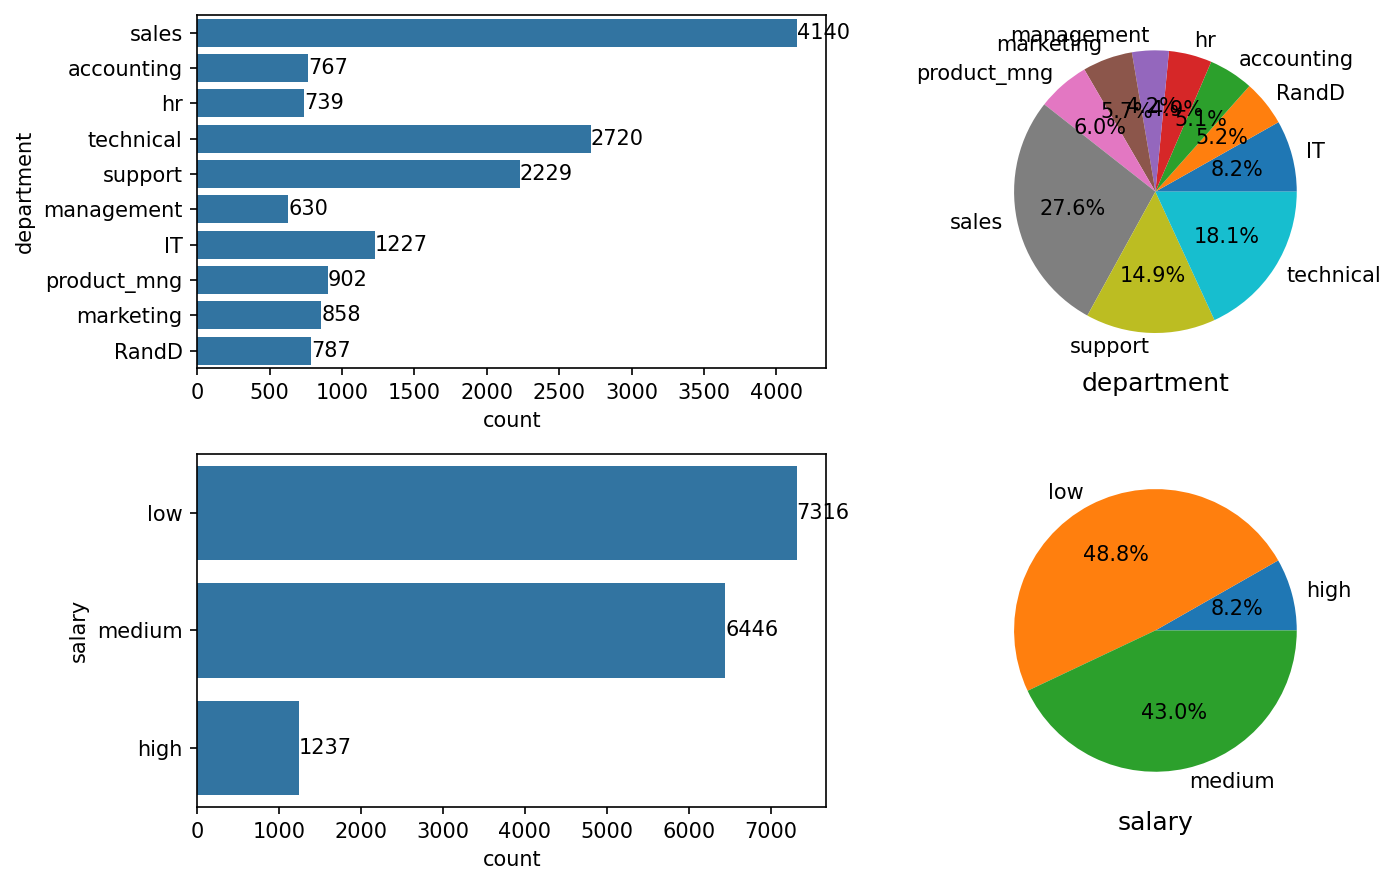

In [96]:
plt.figure(figsize=(10,3*len(cat_cols)))
for i, col in enumerate(cat_cols):
  plt.subplot(len(cat_cols), 2, i*2+1)
  ax = sns.countplot(y=col, data=df)
  ax.bar_label(ax.containers[0])
  

  plt.subplot(len(cat_cols), 2,i*2+2)
  plt.pie(df[col].value_counts().sort_index(), labels=sorted(df[col].unique()),autopct='%.1f%%')
  plt.title(col, y = -0.1)

plt.tight_layout()
plt.show()

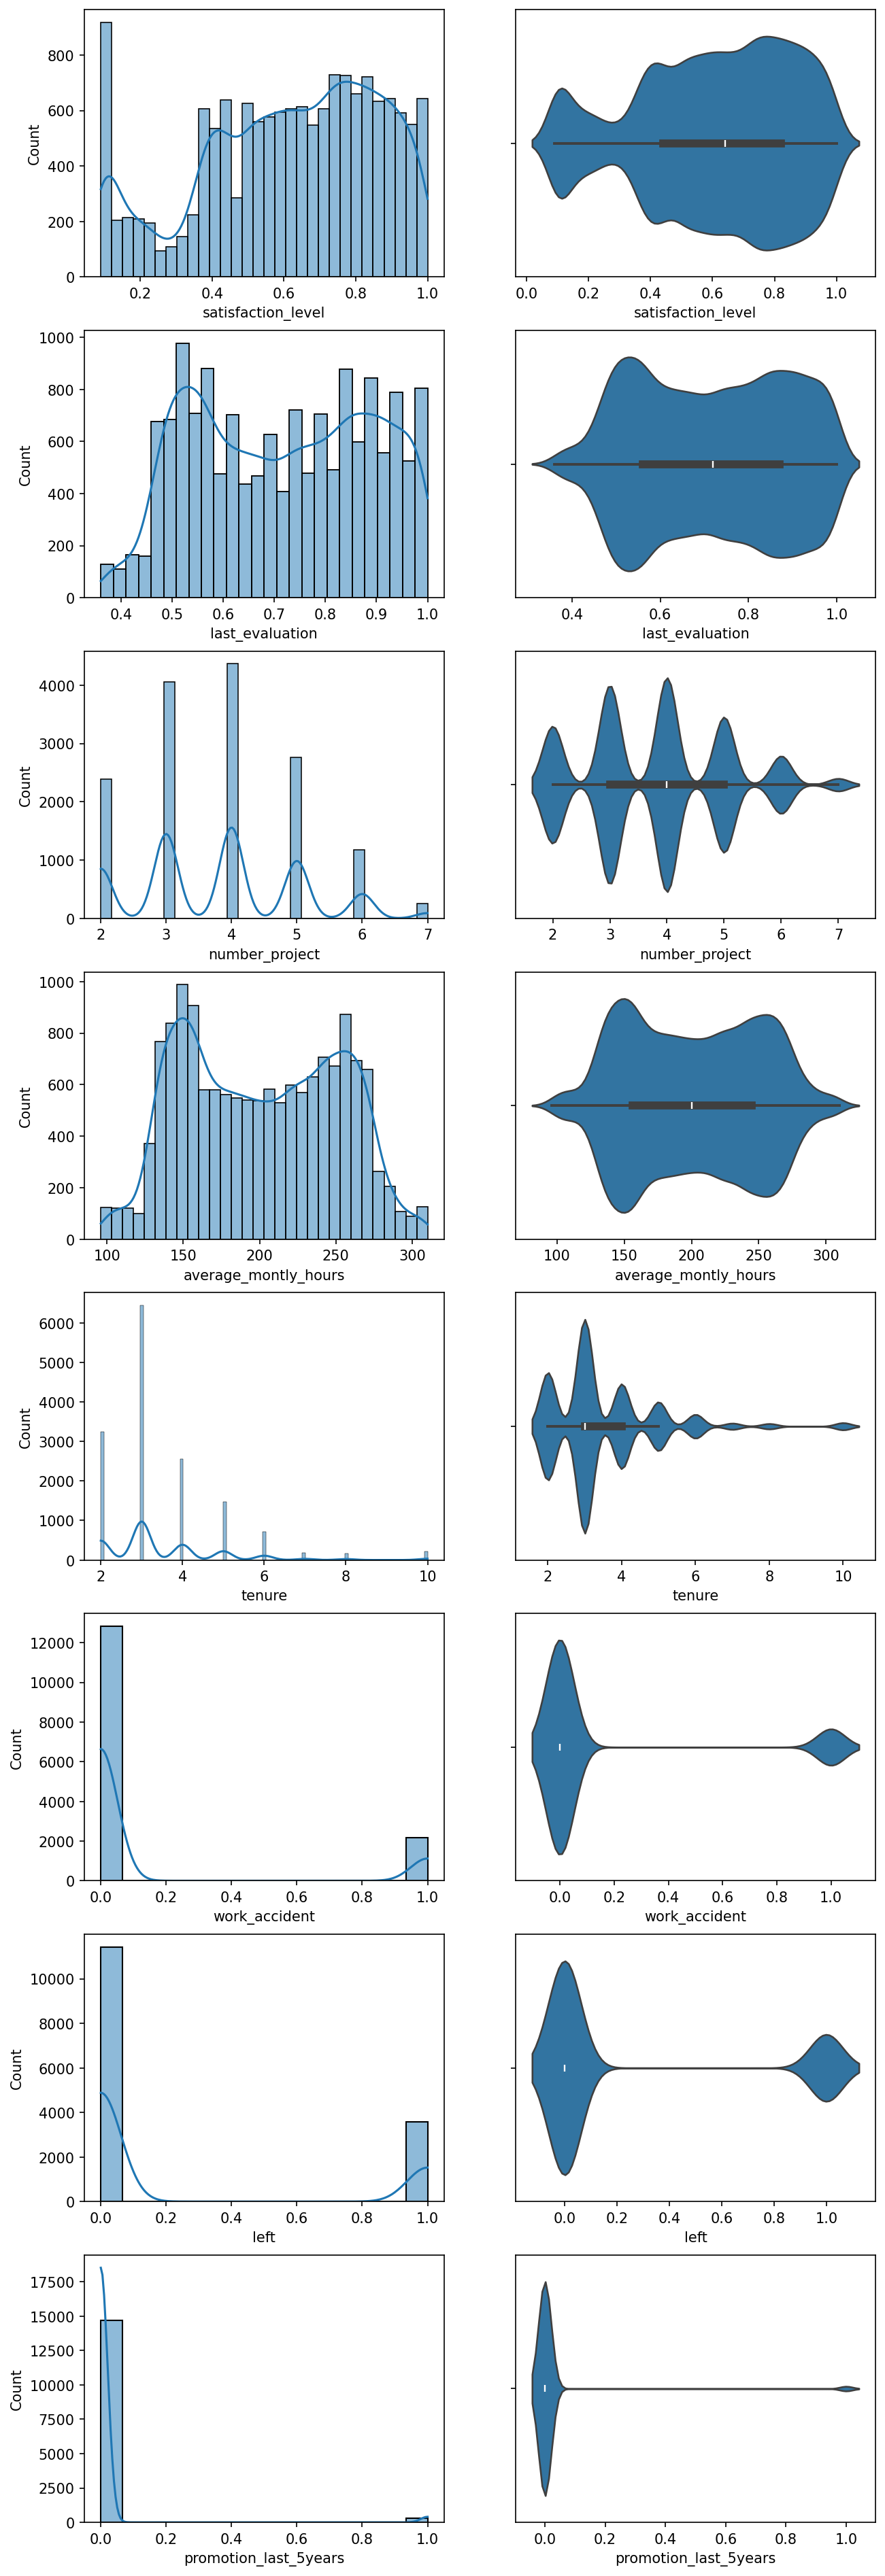

In [91]:
plt.figure(figsize=(10,len(num_cols)*4))
for i,col in enumerate(num_cols):
    plt.subplot(len(num_cols),2,i*2+1)
    sns.histplot(df,x = col,kde=True)
    plt.subplot(len(num_cols),2,i*2+2)
    sns.violinplot(data = df, x = col)